### Laboratorio #7

- Roberto Vallecillos
- Alejandro Gomez
- Paola Contreras

In [133]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [134]:
# Lectura archivo

BankCSV = pd.read_csv('bank_transactions.csv')

In [135]:
# Mostrar datos del archivo

BankCSV.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [136]:
# Droppear datos nulos
BankCSV.dropna(inplace=True)

# Droppear columnas que no se usaran
BankCSV.drop(["TransactionID", "CustomerID", "CustomerDOB", "TransactionDate"], axis=1)

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
0,F,JAMSHEDPUR,17819.05,143207,25.0
1,M,JHAJJAR,2270.69,141858,27999.0
2,F,MUMBAI,17874.44,142712,459.0
3,F,MUMBAI,866503.21,142714,2060.0
4,F,NAVI MUMBAI,6714.43,181156,1762.5
...,...,...,...,...,...
1048562,M,NEW DELHI,7635.19,184824,799.0
1048563,M,NASHIK,27311.42,183734,460.0
1048564,M,HYDERABAD,221757.06,183313,770.0
1048565,M,VISAKHAPATNAM,10117.87,184706,1000.0


In [137]:
# Describir datos
BankCSV.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.041614e+06,1.041614e+06,1.041614e+06
mean,1.149986e+05,1.571221e+05,1.566096e+03
std,8.467609e+05,5.126352e+04,6.561464e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.728140e+03,1.240410e+05,1.600000e+02
50%,1.676852e+04,1.642470e+05,4.575000e+02
75%,5.742885e+04,2.000220e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


<AxesSubplot:>

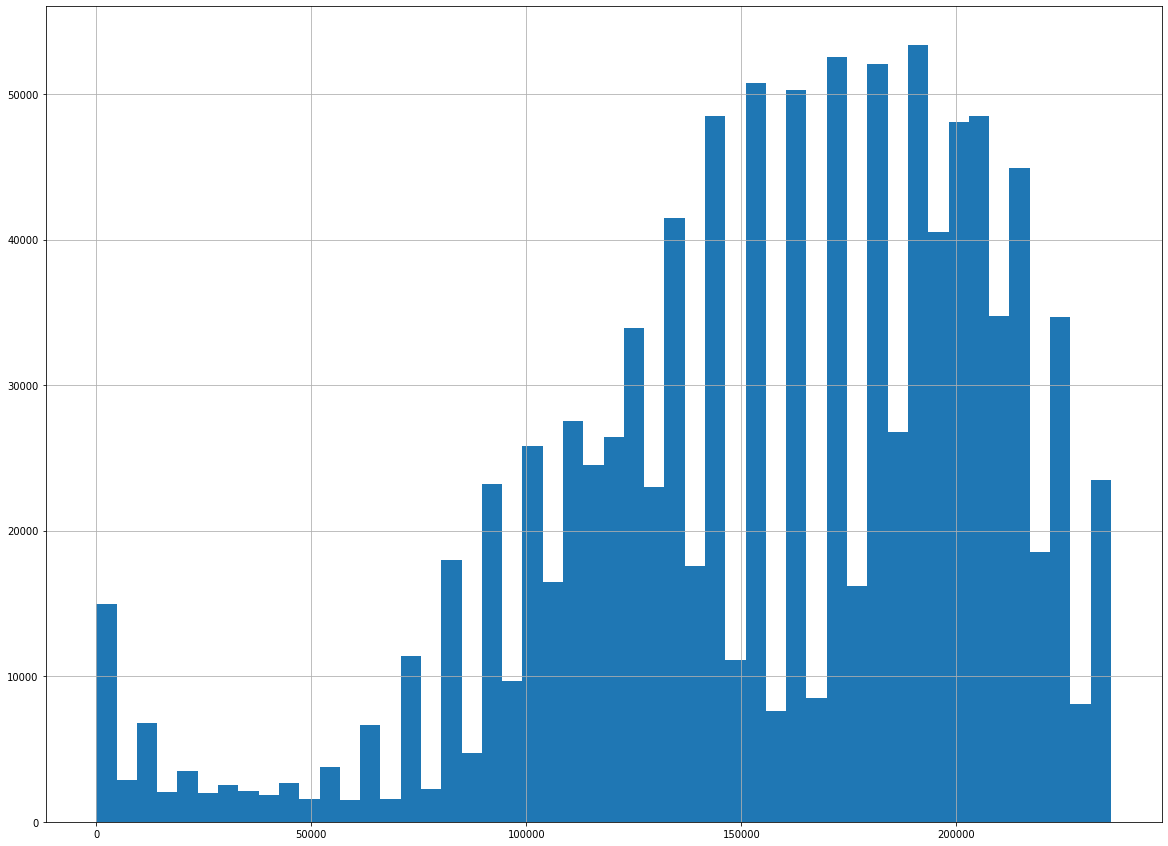

In [138]:
# Graficos exploratorios

BankCSV["TransactionTime"].hist(bins=50, figsize=(20,15))

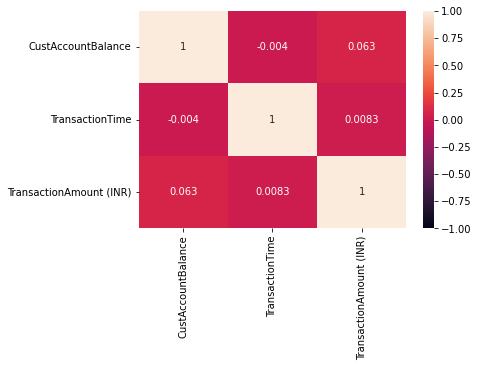

In [139]:
# Grafico de correlacion

corr_matrix = BankCSV.corr()

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

M    760978
F    280635
T         1
Name: CustGender, dtype: int64


<AxesSubplot:xlabel='CustGender', ylabel='count'>

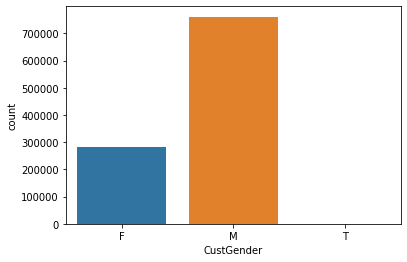

In [140]:
# Grafico exploratorio
print(BankCSV["CustGender"].value_counts())

sns.countplot(x="CustGender", data=BankCSV)

<AxesSubplot:xlabel='TransactionTime', ylabel='TransactionAmount (INR)'>

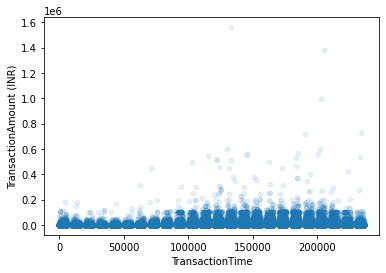

In [141]:
# Grafico exploratorio

BankCSV.plot(kind="scatter", x="TransactionTime", y="TransactionAmount (INR)" , alpha=0.1)

In [142]:
X = BankCSV[["CustAccountBalance", "TransactionAmount (INR)"]]

<AxesSubplot:xlabel='CustAccountBalance', ylabel='TransactionAmount (INR)'>

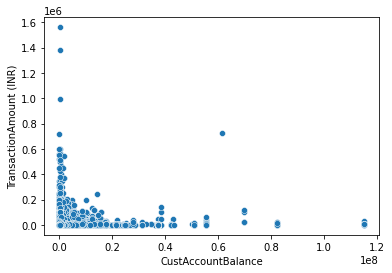

In [143]:
sns.scatterplot(x="CustAccountBalance", y="TransactionAmount (INR)", data=X)

In [144]:
# Label encoder para genero
LabelEncoder = LabelEncoder()
BankCSV['CustGender'] = LabelEncoder.fit_transform(BankCSV['CustGender'])

In [145]:
import random
def DistanciaEuclediana(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))



In [146]:
class KMeans_NoLibreria:
    def __init__(self,k, iter = 10):
        self.k = k
        self.iter = iter

    def train(self,X, TOL = 1e-3):
        #Creación de centroides
        centroides = np.random.rand(self.k,X.shape[1])
        centroidescopy = centroides.copy()

        #Iteraciones
        for _ in range(self.iter):
            #Distancia Euclidanía
            distance = np.linalg.norm(X - centroides[0,:],axis=1).reshape(-1,1)
            for clase in range(1,self.k):
                #Uso de sitancia euclidiana para cada punto son sus centoirdes y su su mejor clase
                distance = np.append(distance,np.linalg.norm(X - centroides[clase,:],axis=1).reshape(-1,1),axis=1)
            #División de clases
            classes = np.argmin(distance,axis=1) 
            # update position
            for clase in set(classes):
                centroides[clase,:] = np.mean(X[classes == clase,:],axis=0)
            #En el caso que los centroides convergen
            if np.linalg.norm(centroides - centroidescopy) < TOL:
                print('Centroid converged')
                break
                
        #Devolución de centroides
        self.centroids = centroides
    
    def predict2(self,X):
        #Predicción
        distance = np.linalg.norm(X - self.centroids[0,:],axis=1).reshape(-1,1)
        for clase in range(1,self.k):
            distance = np.append(distance,np.linalg.norm(X - self.centroids[clase,:],axis=1).reshape(-1,1),axis=1)
        #Clasificación basado en la informaión dada
        classes = np.argmin(distance,axis=1)
        return classes
        




In [147]:
from sklearn.preprocessing import StandardScaler


X= StandardScaler().fit_transform(X)
kmeans = KMeans_NoLibreria(7)
kmeans.train(X)

classes = kmeans.predict2(X)
classes


array([6, 1, 6, ..., 6, 6, 6])

(-2.0, 50.0)

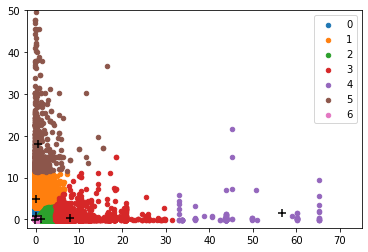

In [148]:
u_labels = list(np.unique(classes))
for i in u_labels:
    plt.scatter(X[classes == i, 0], X[classes == i, 1], s = 20, label = i)
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1],s = 50, c = 'k',marker = '+')
plt.legend()
plt.xlim(-2, 75)
plt.ylim(-2, 50)


In [149]:
# Metricas de evaluacion
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
daviesBoudlin = davies_bouldin_score(X, classes)
print("Davies Boudlin: ", daviesBoudlin)


calinskiHarabasz = calinski_harabasz_score(X, classes)
print("Calinski Harabasz: ", calinskiHarabasz)

Davies Boudlin:  0.6212507386581512
Calinski Harabasz:  489095.45757495833


Librerias 

In [150]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


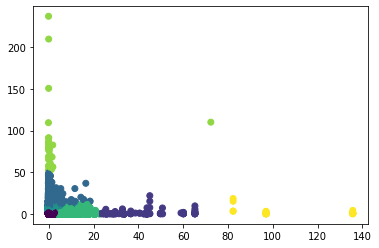

In [151]:
scaler = StandardScaler()
X = scaler.fit_transform(BankCSV[["CustAccountBalance", "TransactionAmount (INR)"]])
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)

labels = kmeans.predict(X)
u_labels = list(np.unique(labels))
for i in u_labels:
    plt.scatter(X[classes == i, 0], X[classes == i, 1], s = 20, label = i, marker='+')
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()



In [152]:
# Metricas de evaluacion
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
daviesBoudlin = davies_bouldin_score(X, labels)
print("Davies Boudlin: ", daviesBoudlin)


calinskiHarabasz = calinski_harabasz_score(X, labels)
print("Calinski Harabasz: ", calinskiHarabasz)

Davies Boudlin:  0.4837756712990534
Calinski Harabasz:  724537.2892558506
